In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def world_map(resources, df2):
    datasets = []
    for link in resources:
        df = pd.read_csv(link)
        df = df[df['Country/Region'] != 'Diamond Princess']
        df = df[df['Country/Region'] != 'MS Zaandam']
        df = df.drop(['Province/State'], axis=1)
        df = df.reset_index(drop=True)
        df = df.groupby('Country/Region').sum()
        df = df.reset_index()
        df.loc[df.loc[df['Country/Region'] == 'US'].index,
               'Country/Region'] = 'United States of America'
        df.loc[df.loc[df['Country/Region'] == 'United Kingdom'].index,
               'Country/Region'] = 'United Kingdom of Great Britain and Northern Ireland'
        df.loc[df.loc[df['Country/Region'] == 'Russia'].index,
               'Country/Region'] = 'Russian Federation'
        df.loc[df.loc[df['Country/Region'] == 'Venezuela'].index,
               'Country/Region'] = 'Venezuela (Bolivarian Republic of)'
        df.loc[df.loc[df['Country/Region'] == 'Bolivia'].index,
               'Country/Region'] = 'Bolivia (Plurinational State of)'
        df.loc[df.loc[df['Country/Region'] == 'Taiwan*'].index,
               'Country/Region'] = 'Taiwan, Province of China'
        df.loc[df.loc[df['Country/Region'] == 'Syria'].index,
               'Country/Region'] = 'Syrian Arab Republic'
        df.loc[df.loc[df['Country/Region'] == 'Korea, South'].index,
               'Country/Region'] = 'Korea, Republic of'
        df.loc[df.loc[df['Country/Region'] == 'Iran'].index,
               'Country/Region'] = 'Iran (Islamic Republic of)'
        df.loc[df.loc[df['Country/Region'] == 'Cote d\'Ivoire'].index,
               'Country/Region'] = 'Côte d\'Ivoire'
        df.loc[df.loc[df['Country/Region'] ==
                      'Congo (Kinshasa)'].index, 'Country/Region'] = 'Congo, Democratic Republic of the'
        df.loc[df.loc[df['Country/Region'] ==
                      'Congo (Brazzaville)'].index, 'Country/Region'] = 'Congo'
        df.loc[df.loc[df['Country/Region'] == 'Moldova'].index,
               'Country/Region'] = 'Moldova, Republic of'
        df.loc[df.loc[df['Country/Region'] == 'Tanzania'].index,
               'Country/Region'] = 'Tanzania, United Republic of'
        df.loc[df.loc[df['Country/Region'] == 'Brunei'].index,
               'Country/Region'] = 'Brunei Darussalam'
        code2 = []
        for i in df['Country/Region']:
            try:
                code2.append(df2[df2['name'] == i]['alpha-3'].values[0])
            except:
                code2.append('NA')

        df['code'] = code2
        df.loc[df.loc[df['Country/Region'] == 'United Kingdom of Great Britain and Northern Ireland'].index,
               'Country/Region'] = 'United Kingdom'
        datasets.append(df)

    for i in range(len(datasets)):
        datasets[i] = datasets[i].drop(
            ['Lat', 'Long'], axis=1)
        datasets[i] = datasets[i].melt(
            id_vars=["Country/Region", "code"],
            var_name="Dates",
            value_name="Cases")

    return datasets

In [3]:
data = pd.read_csv('../data/all.csv')
up, low = np.inf, 0
resources = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
            ]

data_list = world_map(resources, data)

In [4]:
new = pd.DataFrame([data_list[0]['Country/Region'], data_list[0]['code'], 
                    data_list[0]['Dates'], data_list[0].iloc[:, -1], data_list[1].iloc[:, -1], 
                    data_list[2].iloc[:, -1]]).transpose()

new.tail()

,Country/Region,code,Dates,Cases,Cases,Cases
29755,West Bank and Gaza,NA,6/29/20,2185,447,5
29756,Western Sahara,ESH,6/29/20,10,8,1
29757,Yemen,YEM,6/29/20,1128,432,304
29758,Zambia,ZMB,6/29/20,1568,1311,22
29759,Zimbabwe,ZWE,6/29/20,574,152,7


In [5]:
df = pd.read_csv('../data/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_1120885.csv', skiprows=[0, 1, 2])
df = df.drop(columns=["Country Name", "Indicator Name", "Indicator Code"])
df.set_index('Country Code', inplace=True)
df.head()
#df.columns

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,0.5,0.5,0.5,0.5,NaN,NaN,NaN,NaN,NaN
AGO,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,5.102676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.6,2.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Beds'] = df.ffill(axis=1).iloc[:, -1]
df = df[df['Beds'].notna()]
#df.isnull().mean() * 100
df = df['Beds']
merged_one = pd.merge(left=new, right=df, left_on='code', right_on=df.index)
df2 = pd.read_excel('../data/PopulationAgeSex-20200621022821.xlsx', sheet_name='Data', skiprows=[0, 2, 3, 4])
df2 = df2.drop(columns=["ISO 3166-1 numeric code", "Time", "Sex", "Note"])
df2.Location = [i.lstrip() for i in list(df2.Location.values)]
merged_one2 = pd.merge(left=merged_one, right=df2, left_on='Country/Region', right_on=df2.Location)

In [166]:
country_name = 'Germany'
dates_range = list(merged_one2[merged_one2['Country/Region']==country_name]['Dates'])
cases = merged_one2[merged_one2['Country/Region']==country_name].iloc[:, 3].values
recovered = merged_one2[merged_one2['Country/Region']==country_name].iloc[:, 4].values
deths = merged_one2[merged_one2['Country/Region']==country_name].iloc[:, 5].values
population = int(sum(merged_one2[merged_one2['Country/Region']==country_name].values[0][8:])*1000)
country_latest = list(merged_one2[(merged_one2['Country/Region']==country_name) & (merged_one2['Dates']==list(merged_one2['Dates'].unique())[::-1][0])].values[0])
cum_cases = country_latest[3]
cum_recovered = country_latest[4]
cum_deths = country_latest[5]
beds = int(country_latest[6]*population/1000)
age_dist = dict(zip(list(merged_one2.columns[8:]), 
                      [int(i) for i in list(merged_one2[merged_one2['Country/Region']==country_name].values[0][8:]*1000)]))
age_props = dict(zip(list(merged_one2.columns[8:]), np.array(list(age_dist.values()))/population))
# https://science.sciencemag.org/content/368/6490/489
true_cum_cases = cum_cases/0.14
likelihood_to_get_it = (true_cum_cases/population)*100

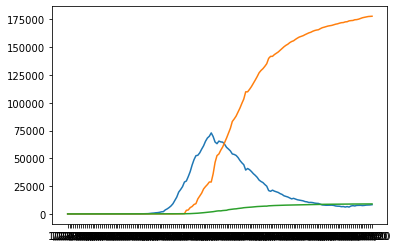

In [167]:
susceptible = [(population - cases[i] - recovered[i] - deths[i]) for i in range(len(dates_range))]
infected = [(cases[i] - recovered[i] - deths[i]) for i in range(len(dates_range))]
d = [i for i in range(len(dates_range))]
#plt.plot(dates_range, susceptible)
plt.plot(dates_range, infected)
plt.plot(dates_range, recovered)
plt.plot(dates_range, deths)
plt.show()

In [168]:
null = 0
for i in range(len(infected)):
    if infected[i] <= 0:
        null += 1
    else:
        break
        
print(null)

5


[ 0.31702407  0.96366255  0.63662357  0.03247502  6.36635109  1.44583532
  0.86080377 15.81625525]
0.9343124587868747


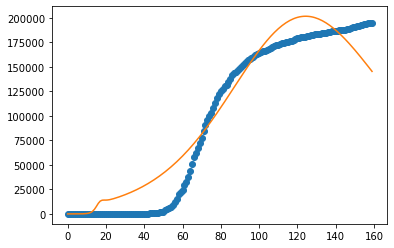

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from sklearn.metrics import r2_score

infected = cases

def sir_step_ahead(y, d, beta, gamma):
    S, I, R = y
    N = S + I + R
    dsdt = -beta * I * (S / N)
    didt = beta * I * (S / N) - gamma * I
    drdt = gamma * I
    return dsdt, didt, drdt

def r_time(t, R0_beg, R0_end, dec_factor, x0):
    adaptive_r = ((R0_beg-R0_end)/(1+np.exp(-dec_factor*(-t+x0)))) + R0_end
    return adaptive_r

def alpha2(scaling, I, N, opt_alpha):
        return scaling * (I/N) + opt_alpha

def ad_seir_step_ahead(y, t, gamma, delta, scaling, rho, R0_beg, R0_end, dec_factor, x):
    global opt_alpha
    S, E, I, R, D = y
    N = S + E + I + R + D
    r_t = r_time(t, R0_beg, R0_end, dec_factor, x)
    alpha_t = alpha2(scaling, I, N, opt_alpha)
    beta_t = r_t * (1/(alpha_t*(1/rho)+(1-alpha_t)*(1/gamma)))
    dsdt = -beta_t * I * (S / N)
    dedt = beta_t * I * (S / N) - delta * E
    didt = delta * E - (1 - alpha_t) * gamma * I - alpha_t * rho * I
    drdt = (1 - alpha_t) * gamma * I
    dddt = alpha_t * rho * I
    return dsdt, dedt, didt, drdt, dddt

def r_time2(t, sim_days, scale_factor):
    return scale_factor*np.sin(t/(sim_days/10))+scale_factor +1

def ad_seir_step_ahead2(y, t, gamma, delta, scaling, rho, scale_factor):
    global sim_days
    global opt_alpha
    S, E, I, R, D = y
    N = S + E + I + R + D
    r_t = r_time2(t, sim_days, scale_factor)
    alpha_t = alpha2(scaling, I, N, opt_alpha)
    beta_t = r_t * (1/(alpha_t*(1/rho)+(1-alpha_t)*(1/gamma)))
    dsdt = -beta_t * I * (S / N)
    dedt = beta_t * I * (S / N) - delta * E
    didt = delta * E - (1 - alpha_t) * gamma * I - alpha_t * rho * I
    drdt = (1 - alpha_t) * gamma * I
    dddt = alpha_t * rho * I
    return dsdt, dedt, didt, drdt, dddt


def fit_odeint(t, gamma, delta, scaling, rho, R0_beg, R0_end, dec_factor, x):
    return integrate.odeint(ad_seir_step_ahead, y0, t, args=(gamma, delta, scaling, rho, R0_beg, R0_end, dec_factor, x))[:,1]

def fit_odeint2(t, gamma, delta, scaling, rho, scale_factor):
    return integrate.odeint(ad_seir_step_ahead2, y0, t, args=(gamma, delta, scaling, rho, scale_factor))[:,1]

sim_days = len(infected)
N = population
I0 = infected[null]
S0 = N - I0
R0 = 0.0
E0 = 0.0
D0 = 0.0
y0 = S0, E0, I0, R0, D0
age_based_alpha = [0.003, 0.002, 0.001, 0.005, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03,
                           0.04, 0.05, 0.07, 0.07, 0.08, 0.1, 0.1, 0.12, 0.199]
pop_age_prop = list(age_props.values())
opt_alpha = sum([i*j for i, j in zip(age_based_alpha, pop_age_prop)])

popt, pcov = optimize.curve_fit(fit_odeint, d[:len(d)-null], infected[null:], bounds=(0.000, [1., 1., 1., 1., 10, 10, 1., 50.]))
print(popt)
fitted = fit_odeint(d, *popt)

# popt, pcov = optimize.curve_fit(fit_odeint2, d[:len(d)-null], infected[null:], bounds=(0.000, [1., 1., 1., 1., 10]))
# print(popt)
# fitted = fit_odeint2(d, *popt)

r2_res = r2_score(infected, fitted)
print(r2_res)

plt.plot(d, infected, 'o')
plt.plot(d, fitted)
plt.show()

In [197]:
def comulative_plot2(negatives, survivors, dates_range, r2_res):
    fig = go.Figure(
        data=[go.Scatter(x=dates_range, y=negatives,
                         mode="lines", name='Real Cases Trend',
                         line=dict(width=2, color="blue")),
             go.Scatter(x=dates_range, y=survivors,
                         mode="lines", name='Inferred Trend',
                         line=dict(width=2, color="orange"))],
            layout=go.Layout(
            title_text="Advanced SEIR Parameters Estimation (R2 Score="+str(round(r2_res, 3))+")", hovermode="closest",
            updatemenus= [
                {
                    "buttons": [
                        {
                            "args": [None, {"frame": {"duration": 100, "redraw": False},
                                            "fromcurrent": True, 
                                            "transition": {"duration": 10,
                                                           "easing": "quadratic-in-out"}}],
                            "label": "Play",
                            "method": "animate"
                        },
                        {
                            "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                              "mode": "immediate",
                                              "transition": {"duration": 0}}],
                            "label": "Pause",
                            "method": "animate"
                        }
                    ],
                    "direction": "left",
                    "pad": {"r": 10, "t": 87},
                    "showactive": False,
                    "type": "buttons",
                    "x": 0.14,
                    "xanchor": "right",
                    "y": 1.65,
                    "yanchor": "top"
                }
            ]),

        frames=[go.Frame(
            data=[go.Scatter(
                x=[i for i in range(k)],
                y=negatives,
                mode="lines",
                line=dict(width=2, color="blue")),
                 go.Scatter(
                x=[i for i in range(k)],
                y=survivors,
                mode="lines",
                line=dict(width=2, color="orange"))])

            for k in range(len(negatives))],

    )
    fig.update_xaxes(title_text="Number of Days")
    fig.update_yaxes(title_text="Comulative Cases")
    fig.show()

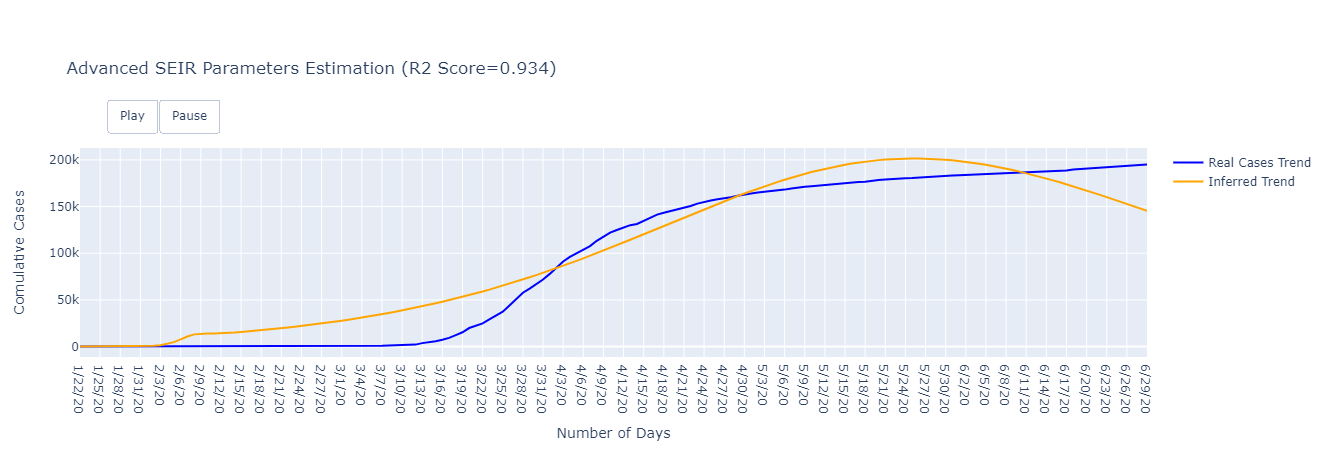

In [198]:
comulative_plot2(cases, fitted, dates_range, r2_res)

In [214]:
cols = ['gamma', 'delta', 'scaling', 'rho',
                    'R0_beg', 'R0_end', 'dec_factor', 'x']
dataframe = pd.DataFrame([popt], columns=cols)
dataframe

,gamma,delta,scaling,rho,R0_beg,R0_end,dec_factor,x
0,0.317024,0.963663,0.636624,0.032475,6.366351,1.445835,0.860804,15.816255


In [159]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import integrate, optimize
# from sklearn.metrics import r2_score

# #infected = cases

# def seir_step_ahead(y, t, beta, gamma, delta, rho):
#     global opt_alpha
#     S, E, I, R, D = y
#     N = S + E + I + R + D
#     dsdt = -beta * I * (S / N)
#     dedt = beta * I * (S / N) - delta * E
#     didt = delta * E - (1 - opt_alpha) * gamma * I - opt_alpha * rho * I
#     drdt = (1 - opt_alpha) * gamma * I
#     dddt = opt_alpha * rho * I
#     return dsdt, dedt, didt, drdt, dddt


# def fit_odeint(t, beta, gamma, delta, rho):
#     return integrate.odeint(seir_step_ahead, y0, t, args=(beta, gamma, delta, rho))[:,1]

# sim_days = len(infected)
# N = population
# I0 = infected[null]
# S0 = N - I0
# R0 = 0.0
# E0 = 0.0
# D0 = 0.0
# y0 = S0, E0, I0, R0, D0
# age_based_alpha = [0.003, 0.002, 0.001, 0.005, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03,
#                            0.04, 0.05, 0.07, 0.07, 0.08, 0.1, 0.1, 0.12, 0.199]
# pop_age_prop = list(age_props.values())
# opt_alpha = sum([i*j for i, j in zip(age_based_alpha, pop_age_prop)])

# popt, pcov = optimize.curve_fit(fit_odeint, d[:len(d)-null], infected[null:], method='trf', bounds=(0.000, [1., 1., 1., 1.]))
# print(popt)
# fitted = fit_odeint(d, *popt)

# r2_res = r2_score(infected, fitted)
# print(r2_res)

# plt.plot(d, infected, 'o')
# plt.plot(d, fitted)
# plt.show()